<a href="https://colab.research.google.com/github/inrok86/cbpc/blob/main/scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn examples
codes from https://scikit-learn.org/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Linear regression

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

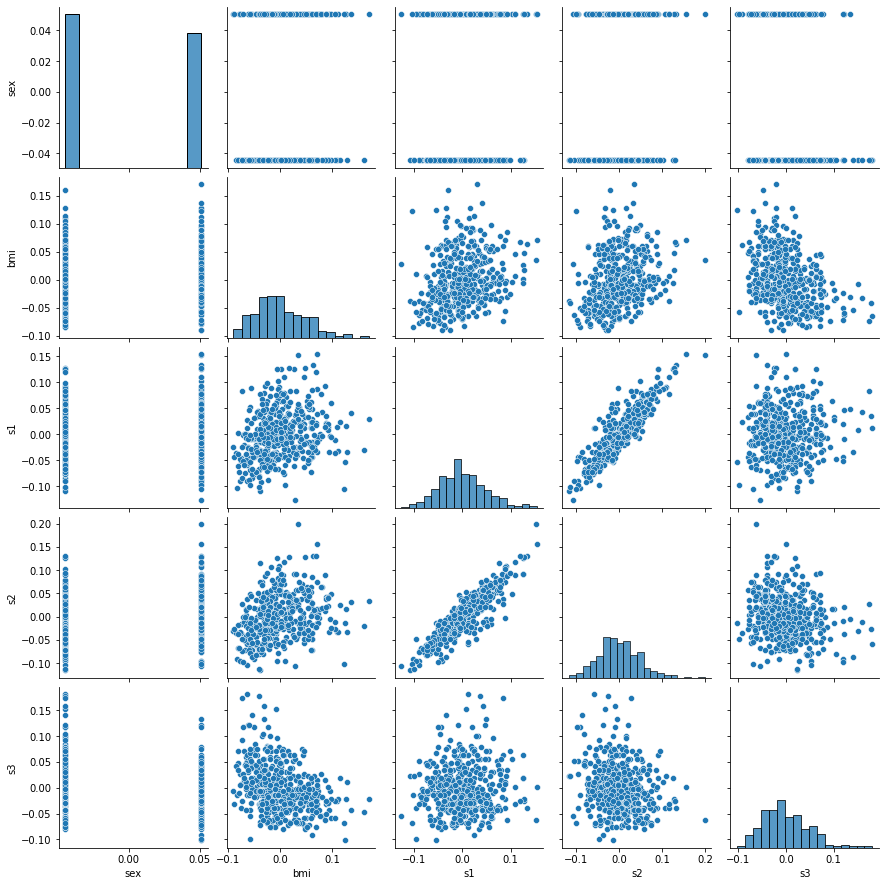

In [2]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_data=pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
sns.pairplot(diabetes_data[['sex','bmi','s1','s2','s3']])
print(diabetes.DESCR)

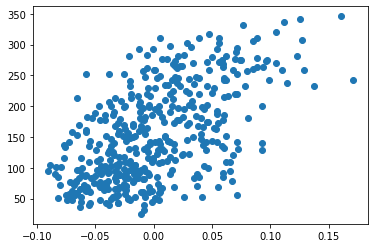

In [3]:
selection="bmi"
plt.plot(diabetes_data[selection],diabetes.target,'o')

In [4]:
# Use only one feature
diabetes_X_single = diabetes_data[selection].to_numpy().reshape((-1,1))

# Split the data into training/testing sets
diabetes_X_train,diabetes_X_test,diabetes_y_train,diabetes_y_test=train_test_split(diabetes_X_single,diabetes.target,test_size=0.1,random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# Print
print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'%mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Coefficient of determination: %.2f'%r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [955.62706895]
Mean squared error: 3835.44
Coefficient of determination: 0.37


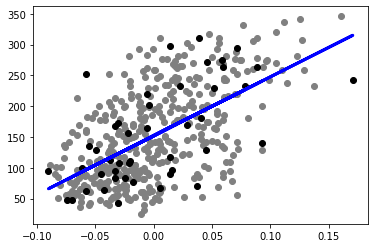

In [5]:
# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train,  color='gray')
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

# 2. Princial component decomposition

In [6]:
from sklearn.decomposition import PCA
rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3],
       [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)

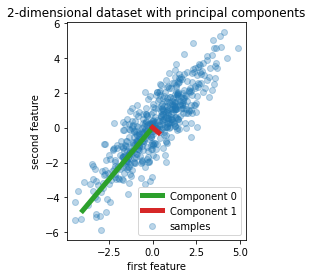

In [7]:
plt.scatter(X[:, 0], X[:, 1], alpha=.3, label='samples')
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot([0, comp[0]], [0, comp[1]], label=f"Component {i}", linewidth=5,
             color=f"C{i + 2}")
plt.gca().set(aspect='equal',
              title="2-dimensional dataset with principal components",
              xlabel='first feature', ylabel='second feature')
plt.legend()
plt.show()

In [8]:
# pca decomposition of diabetes data
target_prop=['sex', 'bmi', 's5']
diabetes_X=diabetes_data[target_prop]
pca = PCA(n_components=1).fit(diabetes_X)

In [9]:
for i,j in zip(target_prop,pca.components_[0]):
    print(f"component {i} : {j}")

component sex : 0.3186317767782413
component bmi : 0.6598027521606857
component s5 : 0.6805395793547395


Coefficients: 
 [834.08943921]
Mean squared error: 2823.93
Coefficient of determination: 0.54


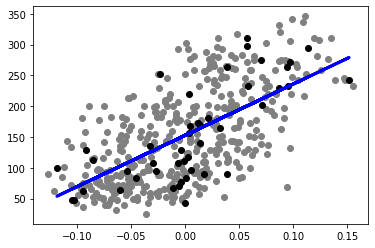

In [10]:
diabetes_X_transform=pca.transform(diabetes_X)

# Use only one feature
diabetes_X_single = diabetes_X_transform.reshape((-1,1))

# Split the data into training/testing sets
diabetes_X_train,diabetes_X_test,diabetes_y_train,diabetes_y_test=train_test_split(diabetes_X_single,diabetes.target,test_size=0.1,random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)

# Print
print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'%mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Coefficient of determination: %.2f'%r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_train[:,0], diabetes_y_train,  color='gray')
plt.scatter(diabetes_X_test[:,0], diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.show()

# 3. Decision Tree Classifier

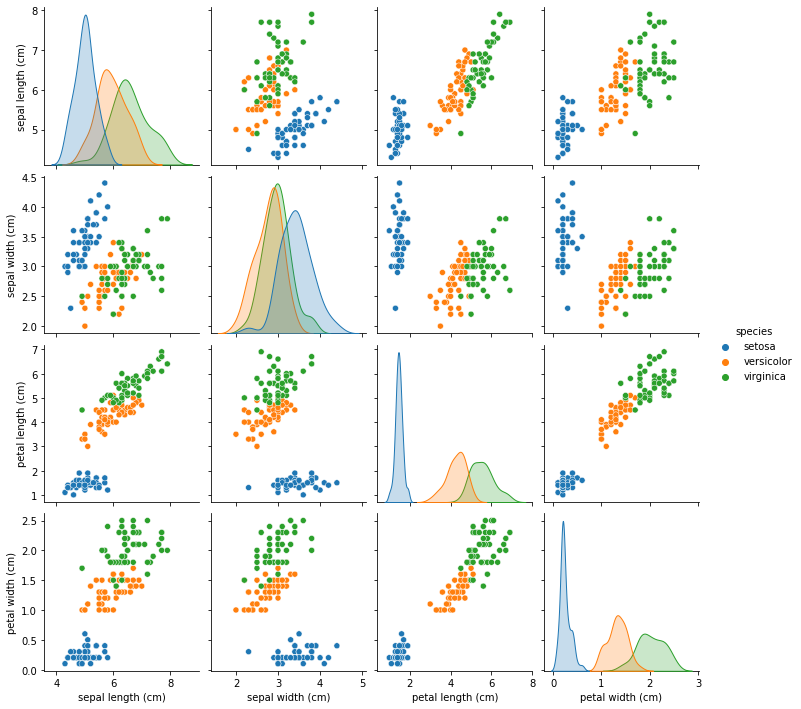

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = np.array([iris.target_names[i] for i in iris.target])
sns.pairplot(df, hue='species')

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text,plot_tree

decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)

[Text(133.92000000000002, 181.2, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

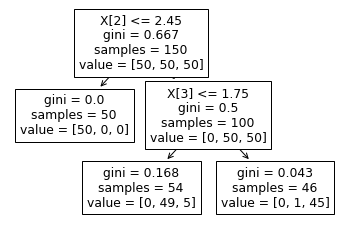

In [13]:
plot_tree(decision_tree)

# 4. Classifiers

In [14]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

classifiers = {
    "Nearest Neighbors":KNeighborsClassifier(3),
    "Linear SVM":SVC(kernel="linear", C=0.025),
    "RBF SVM":SVC(gamma=2, C=1),
    "Gaussian Process":GaussianProcessClassifier(1.0 * RBF(1.0)),
    "Decision Tree":DecisionTreeClassifier(max_depth=4),
    "Random Forest":RandomForestClassifier(max_depth=4, n_estimators=10, max_features=1),
    "Neural Net":MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost":AdaBoostClassifier(),
    "Naive Bayes":GaussianNB(),
    "QDA":QuadraticDiscriminantAnalysis(),
}

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

dataset 0 is classified by Nearest Neighbors
dataset 0 is classified by Linear SVM
dataset 0 is classified by RBF SVM
dataset 0 is classified by Gaussian Process
dataset 0 is classified by Decision Tree
dataset 0 is classified by Random Forest
dataset 0 is classified by Neural Net
dataset 0 is classified by AdaBoost
dataset 0 is classified by Naive Bayes
dataset 0 is classified by QDA
dataset 1 is classified by Nearest Neighbors
dataset 1 is classified by Linear SVM
dataset 1 is classified by RBF SVM
dataset 1 is classified by Gaussian Process
dataset 1 is classified by Decision Tree
dataset 1 is classified by Random Forest
dataset 1 is classified by Neural Net
dataset 1 is classified by AdaBoost
dataset 1 is classified by Naive Bayes
dataset 1 is classified by QDA
dataset 2 is classified by Nearest Neighbors
dataset 2 is classified by Linear SVM
dataset 2 is classified by RBF SVM
dataset 2 is classified by Gaussian Process
dataset 2 is classified by Decision Tree
dataset 2 is classifi

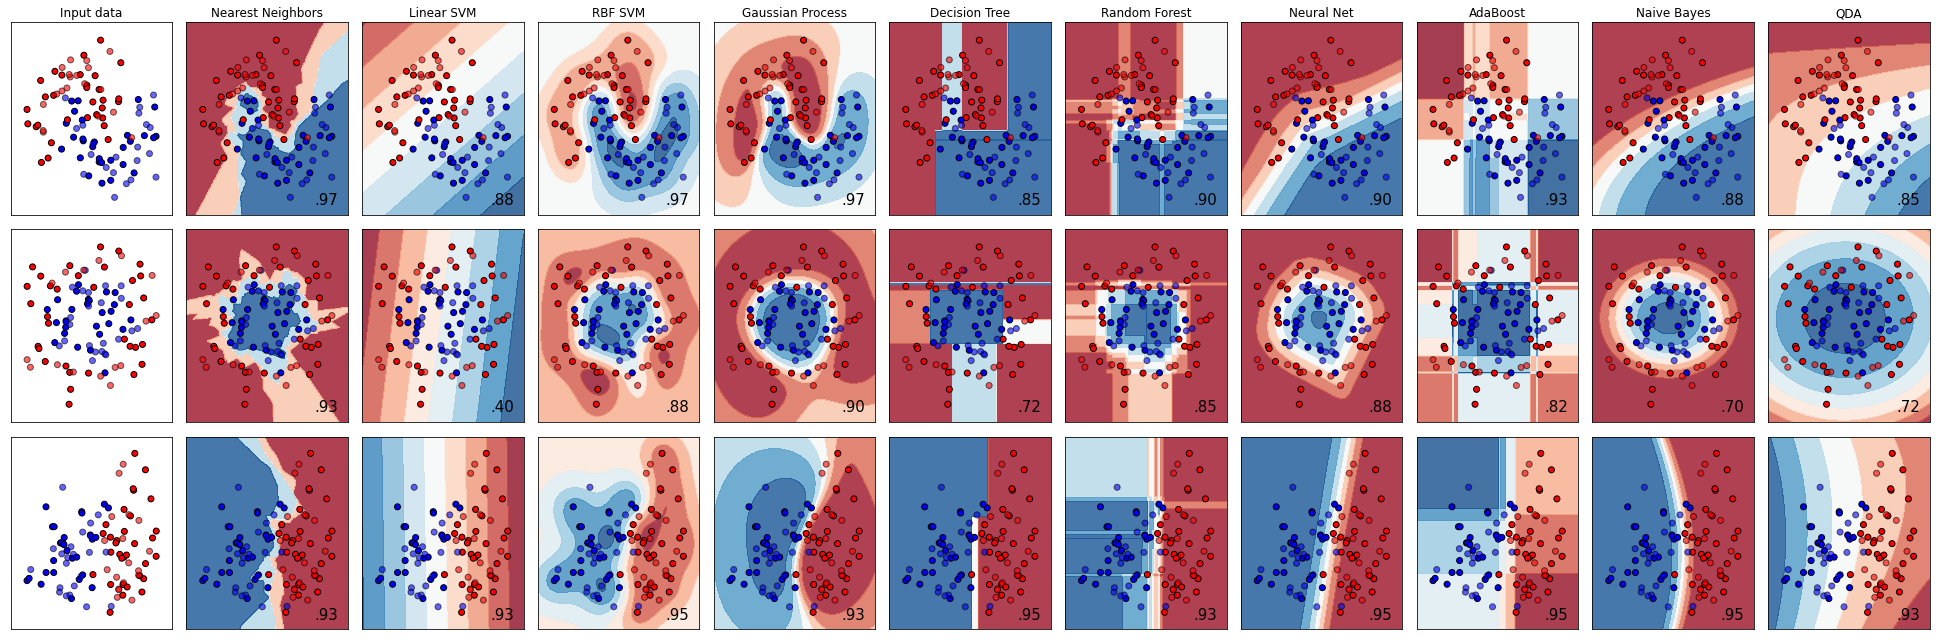

In [15]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in classifiers.items():
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
        print(f"dataset {ds_cnt} is classified by {name}")

plt.tight_layout()
plt.show()

# 5. K-means clustering

In [16]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [17]:
data[24]

array([ 0.,  0.,  0.,  0., 12.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 14.,
        1.,  0.,  0.,  0.,  0.,  4., 16.,  7.,  8.,  0.,  0.,  0.,  0.,
       13.,  9.,  0., 16.,  6.,  0.,  0.,  6., 16., 10., 11., 16.,  0.,
        0.,  0.,  0.,  5., 10., 13., 16.,  0.,  0.,  0.,  0.,  0.,  0.,
        6., 16.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  8.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

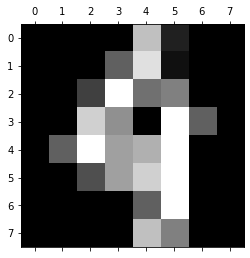

In [18]:
plt.gray() 
plt.matshow(data[24].reshape(8,8)) 
plt.show()

In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)
print(kmeans.cluster_centers_)

[[  3.69682597  -7.80212747]
 [  1.43194235  21.56387748]
 [ 22.56835863  -0.08794117]
 [-14.63261049  11.43601444]
 [-22.24127742   3.23949458]
 [ -3.58131067 -17.19922478]
 [  9.54672545 -18.83373043]
 [ 15.92799057  13.04600599]
 [ -4.13211949   1.53713593]
 [-13.25782644  -7.52283179]]


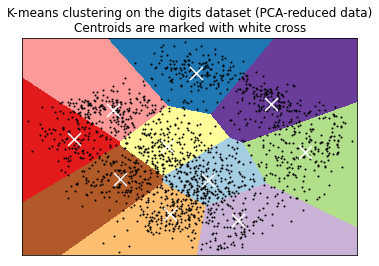

In [20]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# 6. MLP image classification

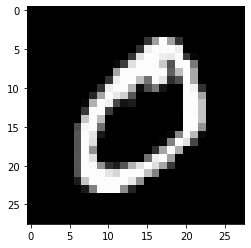

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
plt.imshow(X_train.iloc[1].to_numpy().reshape(28,28)*256)

'9'

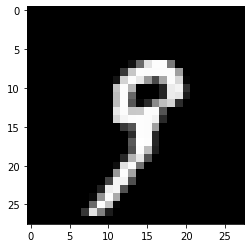

In [22]:
plt.imshow(X_train.iloc[19].to_numpy().reshape(28,28)*256)
y_train[19]

In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, 
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32301376
Iteration 2, loss = 0.15373028
Iteration 3, loss = 0.11473826
Iteration 4, loss = 0.09424770
Iteration 5, loss = 0.07822817
Iteration 6, loss = 0.07010856
Iteration 7, loss = 0.06191392
Iteration 8, loss = 0.05570171
Iteration 9, loss = 0.04968605
Iteration 10, loss = 0.04491873
Iteration 11, loss = 0.04237857
Iteration 12, loss = 0.03744829
Iteration 13, loss = 0.03481582
Iteration 14, loss = 0.03178010
Iteration 15, loss = 0.02824827
Iteration 16, loss = 0.02684339
Iteration 17, loss = 0.02473088
Iteration 18, loss = 0.02237394
Iteration 19, loss = 0.02003937
Iteration 20, loss = 0.01756483


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=20,
              solver='sgd', verbose=10)

Training set score: 0.996367
Test set score: 0.973800


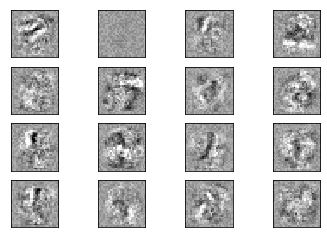

In [24]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

In [25]:
y_pred=mlp.predict(X_test)

1


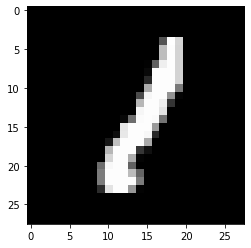

In [26]:
import random
idx=random.randint(0,len(y_pred))
print(y_pred[idx])
plt.imshow(X_test.iloc[idx].to_numpy().reshape(28,28)*256)